<a href="https://colab.research.google.com/github/BoshiLee/pytorch_learning/blob/main/Linear_Regression_MSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 

In [3]:
n_pts = 100
X,y = datasets.make_regression(n_samples=n_pts,n_features=1,n_targets=1,noise=10)

x_data = torch.tensor(X).float()
y_data = torch.tensor(y.reshape(n_pts, 1)).float() # 轉乘 npts * 1 的二維陣列


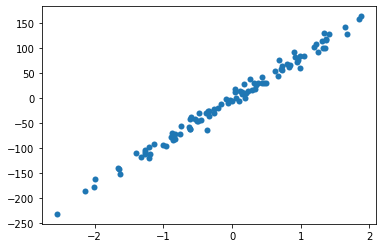

In [4]:
plt.scatter(X,y,linewidths=0.01)
plt.show()

In [5]:
class Model(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(in_features=input_size, out_features=output_size)
  
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [6]:
model = Model(1, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[-0.1342]], requires_grad=True), Parameter containing:
tensor([-0.5119], requires_grad=True)]


In [7]:
def get_parameters(model: Model):
  [w, b] = model.parameters()
  w1 = w[0][0].item()
  b1 = b[0].item()
  return w1, b1

In [8]:
def fit_plot(title: str):
  plt.title = title
  w1, b1 = get_parameters(model)
  x1 = np.array([min(X) - 1, max(X) + 1])
  y1 = w1*x1+b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X,y,linewidths=0.01)
  plt.title = title
  plt.show()  

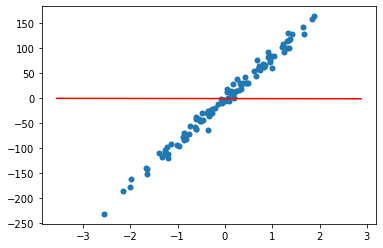

In [9]:
fit_plot("Initial Model")

In [10]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01) #

In [11]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss 7142.38671875
epoch: 1 loss 6873.86328125
epoch: 2 loss 6615.556640625
epoch: 3 loss 6367.08056640625
epoch: 4 loss 6128.05810546875
epoch: 5 loss 5898.1298828125
epoch: 6 loss 5676.94921875
epoch: 7 loss 5464.18359375
epoch: 8 loss 5259.51171875
epoch: 9 loss 5062.62646484375
epoch: 10 loss 4873.22900390625
epoch: 11 loss 4691.03662109375
epoch: 12 loss 4515.77294921875
epoch: 13 loss 4347.17578125
epoch: 14 loss 4184.990234375
epoch: 15 loss 4028.972900390625
epoch: 16 loss 3878.88818359375
epoch: 17 loss 3734.510009765625
epoch: 18 loss 3595.6220703125
epoch: 19 loss 3462.0146484375
epoch: 20 loss 3333.487548828125
epoch: 21 loss 3209.84619140625
epoch: 22 loss 3090.906005859375
epoch: 23 loss 2976.486572265625
epoch: 24 loss 2866.4169921875
epoch: 25 loss 2760.531005859375
epoch: 26 loss 2658.669921875
epoch: 27 loss 2560.679931640625
epoch: 28 loss 2466.4140625
epoch: 29 loss 2375.7314453125
epoch: 30 loss 2288.494140625
epoch: 31 loss 2204.572509765625
epoch: 32 los

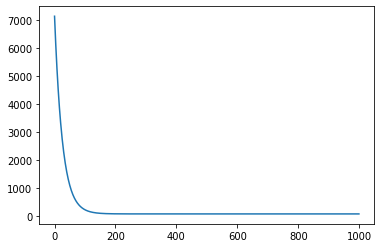

In [12]:
plt.plot(losses)

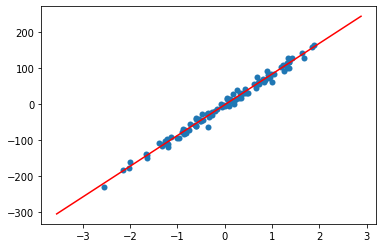

In [13]:
fit_plot("Trained Model")